In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("/Users/namanmuktha/Desktop/mediksearch/Tel & Ap Data/AndhraMBBS.csv")

In [56]:
df.head()

,COLLEGE,RANK,NEET_ROLL_NO,SCORE,SX,CAT,LOC,PHASE,EWS
0,"Siddhartha Medical College, Vijayawada",1503,1206060037,680,M,BCD,AU,P1,NO
1,"Siddhartha Medical College, Vijayawada",2599,1209010031,671,F,OC,AU,P1,NO
2,"Siddhartha Medical College, Vijayawada",5738,1205060436,655,M,OC,AU,P1,NO
3,"Siddhartha Medical College, Vijayawada",8695,1205090412,644,M,OC,APNL,P1,NO
4,"Siddhartha Medical College, Vijayawada",11748,1205050763,635,F,OC,SVU,P1,NO


In [57]:
df.shape

(7664, 9)

In [58]:
df["COLLEGE"].nunique()

38

In [59]:
import seaborn as sns

<Axes: xlabel='COLLEGE', ylabel='count'>

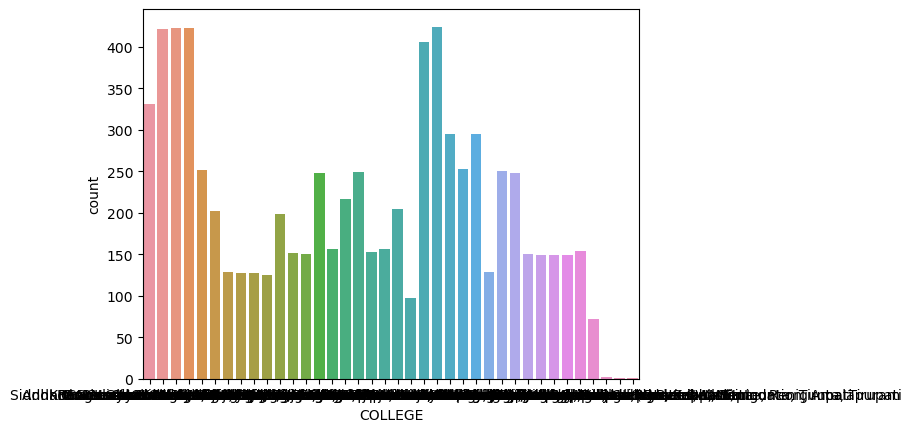

In [60]:
sns.countplot(x=df['COLLEGE'])

In [61]:
df.isna().sum()

COLLEGE         0
RANK            0
NEET_ROLL_NO    0
SCORE           0
SX              0
CAT             0
LOC             0
PHASE           0
EWS             0
dtype: int64

In [62]:
df=df.drop(['NEET_ROLL_NO','SCORE'],axis=1)

In [63]:
df.head()

,COLLEGE,RANK,SX,CAT,LOC,PHASE,EWS
0,"Siddhartha Medical College, Vijayawada",1503,M,BCD,AU,P1,NO
1,"Siddhartha Medical College, Vijayawada",2599,F,OC,AU,P1,NO
2,"Siddhartha Medical College, Vijayawada",5738,M,OC,AU,P1,NO
3,"Siddhartha Medical College, Vijayawada",8695,M,OC,APNL,P1,NO
4,"Siddhartha Medical College, Vijayawada",11748,F,OC,SVU,P1,NO


In [64]:
df.dtypes

COLLEGE    object
RANK        int64
SX         object
CAT        object
LOC        object
PHASE      object
EWS        object
dtype: object

In [65]:
df.nunique()

COLLEGE      38
RANK       4233
SX            2
CAT           8
LOC           6
PHASE         2
EWS           1
dtype: int64

In [66]:
df['PHASE'].unique()

array(['P1', 'P2'], dtype=object)

In [67]:
df=df.drop(['EWS'],axis=1)

In [68]:
df.head()

,COLLEGE,RANK,SX,CAT,LOC,PHASE
0,"Siddhartha Medical College, Vijayawada",1503,M,BCD,AU,P1
1,"Siddhartha Medical College, Vijayawada",2599,F,OC,AU,P1
2,"Siddhartha Medical College, Vijayawada",5738,M,OC,AU,P1
3,"Siddhartha Medical College, Vijayawada",8695,M,OC,APNL,P1
4,"Siddhartha Medical College, Vijayawada",11748,F,OC,SVU,P1


In [69]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['COLLEGE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['COLLEGE'] = encoded_values

In [70]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['SX']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping1 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['SX'] = encoded_values

In [71]:
one_hot_encoded = pd.get_dummies(df['CAT'], prefix='CAT')

# Drop the original 'CAT' column from the DataFrame
df = df.drop('CAT', axis=1)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)


In [72]:
df.head()

,COLLEGE,RANK,SX,LOC,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST
0,32,1503,1,AU,P1,False,False,False,True,False,False,False,False
1,32,2599,0,AU,P1,False,False,False,False,False,True,False,False
2,32,5738,1,AU,P1,False,False,False,False,False,True,False,False
3,32,8695,1,APNL,P1,False,False,False,False,False,True,False,False
4,32,11748,0,SVU,P1,False,False,False,False,False,True,False,False


In [73]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['LOC']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_loc = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['LOC'] = encoded_values

In [74]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['PHASE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_phase = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['PHASE'] = encoded_values

In [75]:
df.head()

,COLLEGE,RANK,SX,LOC,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST
0,32,1503,1,1,0,False,False,False,True,False,False,False,False
1,32,2599,0,1,0,False,False,False,False,False,True,False,False
2,32,5738,1,1,0,False,False,False,False,False,True,False,False
3,32,8695,1,0,0,False,False,False,False,False,True,False,False
4,32,11748,0,5,0,False,False,False,False,False,True,False,False


<Axes: xlabel='COLLEGE', ylabel='count'>

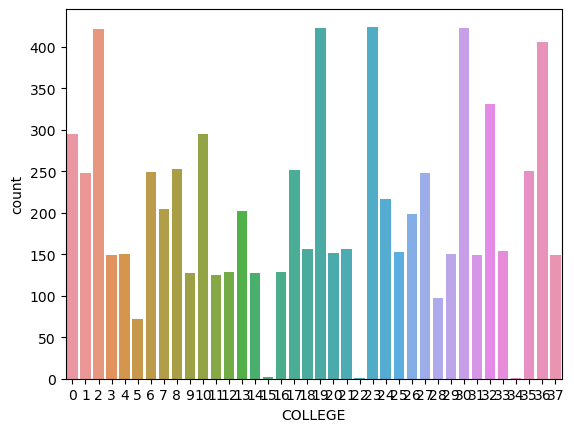

In [76]:
sns.countplot(x=df['COLLEGE'])

In [77]:
for i in df["COLLEGE"].sort_values().unique():
    print(i)
    x=df[df["COLLEGE"]==i].count()
    print(x["COLLEGE"])

0
295
1
248
2
421
3
149
4
150
5
72
6
249
7
205
8
253
9
127
10
295
11
125
12
128
13
202
14
127
15
2
16
128
17
251
18
156
19
423
20
151
21
156
22
1
23
424
24
217
25
153
26
199
27
248
28
97
29
150
30
423
31
149
32
331
33
154
34
1
35
250
36
405
37
149


In [78]:
for i in df["COLLEGE"].sort_values().unique():
    print(i)
    x=df[df["COLLEGE"]==i].count()
    print(x["COLLEGE"])

0
295
1
248
2
421
3
149
4
150
5
72
6
249
7
205
8
253
9
127
10
295
11
125
12
128
13
202
14
127
15
2
16
128
17
251
18
156
19
423
20
151
21
156
22
1
23
424
24
217
25
153
26
199
27
248
28
97
29
150
30
423
31
149
32
331
33
154
34
1
35
250
36
405
37
149


In [79]:
label_mapping
#34
#22
#15

{'ACSR Government Medical College, Nellore': 0,
 'Alluri Seetharama Raju Academy of Medical Sciences, Eluru': 1,
 'Andhra Medical College, Visakhapatnam': 2,
 'Apollo Institute of Medical Sciences and Research, Chittoor': 3,
 'Dr. Pinnamaneni Siddhartha Institute of Medical Sciences, Gannavaram': 4,
 'Fathima Institute of Medical Sciences, Kadapa': 5,
 'GSL Medical College, Rajamahendravaram': 6,
 'Gayatri Vidya Parishad Inst. of Health Care and Medical Technology, Visakhapatnam': 7,
 'Government Medical College, Anantapur': 8,
 'Government Medical College, Eluru': 9,
 'Government Medical College, Kadapa': 10,
 'Government Medical College, Machilipatnam': 11,
 'Government Medical College, Nandyal': 12,
 'Government Medical College, Ongole': 13,
 'Government Medical College, Rajamahendravaram': 14,
 'Government Medical College, Srikakulam': 15,
 'Government Medical College, Vizianagaram': 16,
 'Government Medical College,Srikakulam': 17,
 'Great Eastern Medical School and Hospital , Sri

In [80]:
df = df[~df['COLLEGE'].isin([34, 22, 15])]

<Axes: xlabel='COLLEGE', ylabel='count'>

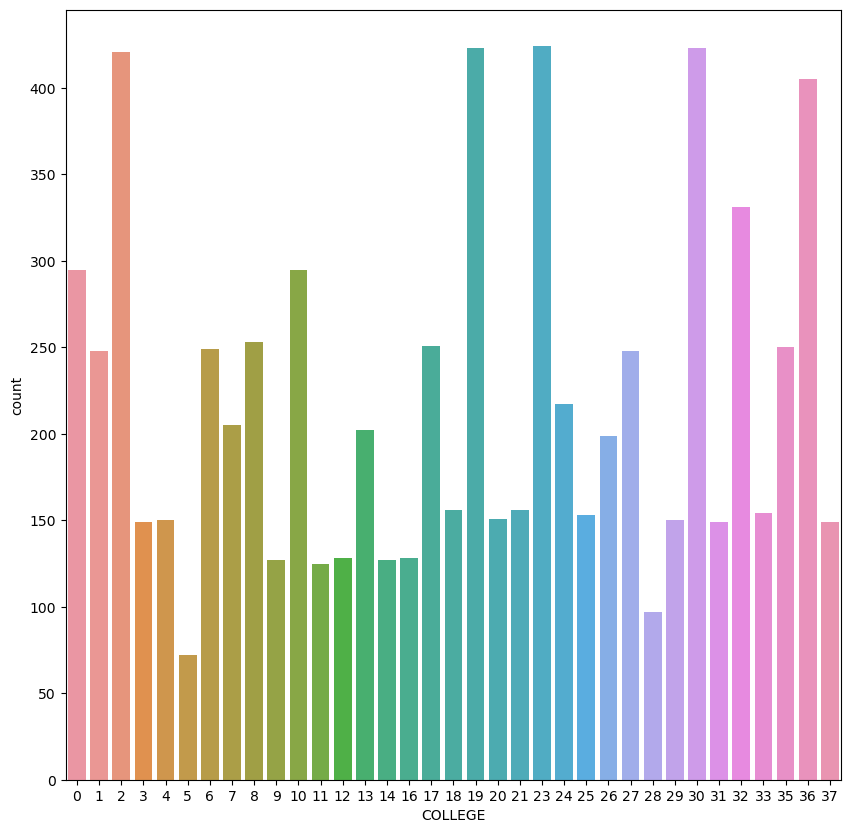

In [81]:
plt.figure(figsize=(10, 10))
sns.countplot(x=df['COLLEGE'])

In [82]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

In [83]:
X=df.drop(['COLLEGE'],axis=1)
y=df['COLLEGE']

In [84]:
X_resampled, y_resampled = oversampler.fit_resample(X,y)

In [85]:
df_updated=X_resampled

In [86]:
df_updated['COLLEGE']=y_resampled

In [87]:
df_updated.head()

,RANK,SX,LOC,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST,COLLEGE
0,1503,1,1,0,False,False,False,True,False,False,False,False,32
1,2599,0,1,0,False,False,False,False,False,True,False,False,32
2,5738,1,1,0,False,False,False,False,False,True,False,False,32
3,8695,1,0,0,False,False,False,False,False,True,False,False,32
4,11748,0,5,0,False,False,False,False,False,True,False,False,32


<Axes: xlabel='COLLEGE', ylabel='count'>

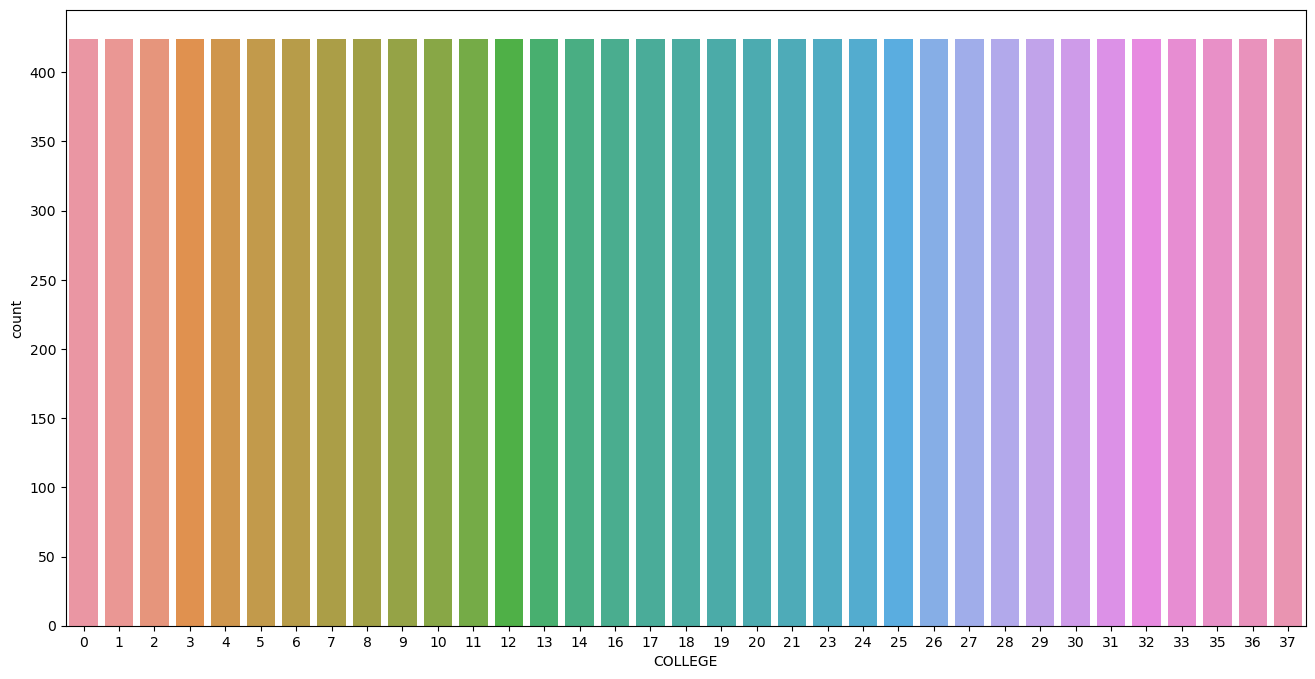

In [88]:
plt.figure(figsize=(16, 8))
sns.countplot(x=df_updated['COLLEGE'])

In [89]:
df_updated.head()

,RANK,SX,LOC,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST,COLLEGE
0,1503,1,1,0,False,False,False,True,False,False,False,False,32
1,2599,0,1,0,False,False,False,False,False,True,False,False,32
2,5738,1,1,0,False,False,False,False,False,True,False,False,32
3,8695,1,0,0,False,False,False,False,False,True,False,False,32
4,11748,0,5,0,False,False,False,False,False,True,False,False,32


In [90]:
df_updated.shape

(14840, 13)

In [91]:
df_updated["RANK"].describe()

count    1.484000e+04
mean     9.007095e+04
std      8.450754e+04
min      1.242000e+03
25%      4.734150e+04
50%      7.399650e+04
75%      1.112300e+05
max      1.184319e+06
Name: RANK, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(df_updated.drop(["COLLEGE"],axis=1),df_updated["COLLEGE"],test_size=0.2,random_state=231)

In [93]:
X_train.head()

,RANK,SX,LOC,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST
11789,139673,1,3,0,False,False,False,False,False,False,False,True
12494,137322,0,1,0,False,False,False,False,False,False,True,False
12126,98040,1,1,0,True,False,False,False,False,False,False,False
4864,97181,0,1,0,False,False,False,False,False,False,True,False
12449,62230,0,1,1,False,False,False,False,False,True,False,False


In [94]:
y_train.head()

11789    20
12494    25
12126    21
4864      9
12449    24
Name: COLLEGE, dtype: int64

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_p=rfc.predict(X_test)
print(accuracy_score(y_p,y_test)*100)
print(confusion_matrix(y_p,y_test))
print(classification_report(y_p,y_test))

90.83557951482479
[[88  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 74 ...  0  1  0]
 ...
 [ 0  0  0 ... 88  0  0]
 [ 2  0  0 ...  1 63  0]
 [ 0  0  0 ...  0  0 86]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        95
           1       0.88      0.91      0.89        78
           2       0.89      0.82      0.86        90
           3       0.92      0.96      0.94        73
           4       0.98      0.94      0.96        88
           5       1.00      0.97      0.99        76
           6       0.86      0.94      0.90        85
           7       0.90      0.92      0.91        89
           8       0.95      0.90      0.92        98
           9       0.97      0.97      0.97        76
          10       0.84      0.89      0.87        83
          11       0.95      0.94      0.94        80
          12       1.00      0.98      0.99        94
          13       0.91      0.87      0.89        82
          14   

In [96]:
y_p

array([10,  6,  3, ..., 27, 35, 31])

In [97]:
y_test

6412     10
8916      6
8240      3
14828    37
9483      9
         ..
2330     36
7584      7
12990    27
14432    35
3420     31
Name: COLLEGE, Length: 2968, dtype: int64

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_p=dt.predict(X_test)
print(accuracy_score(y_p,y_test))
print(classification_report(y_p,y_test))

0.9080188679245284
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        91
           1       0.86      0.90      0.88        78
           2       0.83      0.84      0.84        82
           3       0.92      0.96      0.94        73
           4       0.98      0.92      0.95        90
           5       1.00      1.00      1.00        74
           6       0.87      0.94      0.91        86
           7       0.90      0.96      0.93        85
           8       0.96      0.85      0.90       105
           9       0.97      0.96      0.97        77
          10       0.86      0.92      0.89        83
          11       0.95      0.94      0.94        80
          12       1.00      0.91      0.95       101
          13       0.91      0.87      0.89        82
          14       0.99      0.97      0.98        80
          16       0.96      1.00      0.98        82
          17       0.89      0.94      0.91        78
        

In [99]:
y_p

array([10,  6,  3, ..., 27, 35, 31])

In [100]:
y_test

6412     10
8916      6
8240      3
14828    37
9483      9
         ..
2330     36
7584      7
12990    27
14432    35
3420     31
Name: COLLEGE, Length: 2968, dtype: int64

In [101]:
X_test

,RANK,SX,LOC,PHASE,CAT_BCA,CAT_BCB,CAT_BCC,CAT_BCD,CAT_BCE,CAT_OC,CAT_SC,CAT_ST
6412,63318,0,1,0,True,False,False,False,False,False,False,False
8916,60905,0,1,0,False,False,False,True,False,False,False,False
8240,145730,1,5,0,False,False,False,False,False,False,True,False
14828,106186,1,5,0,False,True,False,False,False,False,False,False
9483,45954,1,1,0,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2330,59916,1,5,0,False,False,False,False,False,False,True,False
7584,156858,0,1,1,False,False,False,False,False,False,True,False
12990,84758,1,5,0,False,False,False,False,True,False,False,False
14432,62094,0,5,1,False,False,False,False,False,True,False,False


In [102]:
p

NameError: name 'p' is not defined

In [ ]:
y_test

6412     10
8916      6
8240      3
14828    37
9483      9
         ..
2330     36
7584      7
12990    27
14432    35
3420     31
Name: COLLEGE, Length: 2968, dtype: int64